In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import geopandas as gpd
from shapely.geometry import Point

In [20]:
path = "pickles/TARGET-communities-extract-wellbeing-cleaned.pkl" # Path of the pickle file / Chemin du fichier pickle
df = pd.read_pickle(path) # Get the data / recupere les donnees
if (type(df) == list) :
    df = pd.DataFrame(data = df, columns = df[0]) 
    df = df.drop(df.index[0])
df.head() # Print first pieces of data / Affiche les premiere donnees

,noise,longitude,latitude,town,district
neighborhood,,,,,
万寿社区居委会,0.0,121.104287016932,31.1558823799679,盈浦街道,青浦区
万泰花园第一居委会,0.0,121.351529089795,31.144326843509,七宝镇,闵行区
万科阳光苑居委会,0.0,121.468520387505,31.0422853979528,吴泾镇,闵行区
万豪居委会,0.0,121.367237458941,31.2407251034807,长征镇,普陀区
万里名轩社区居委会,0.0,121.403601417271,31.269155049366,万里街道,普陀区


In [21]:
df.reset_index()
df = df[df.longitude != ""]
df = df[df.latitude != ""]
df["longitude"] = df['longitude'].apply(float)
df["latitude"] = df['latitude'].apply(float)
gdf = gpd.GeoDataFrame(df, geometry = [Point(float(x),float(y)) for x,y in zip(df.longitude, df.latitude)])
gdf.crs = {'init' : 'epsg:4326'}

AttributeError: 'PathCollection' object has no property 'size'

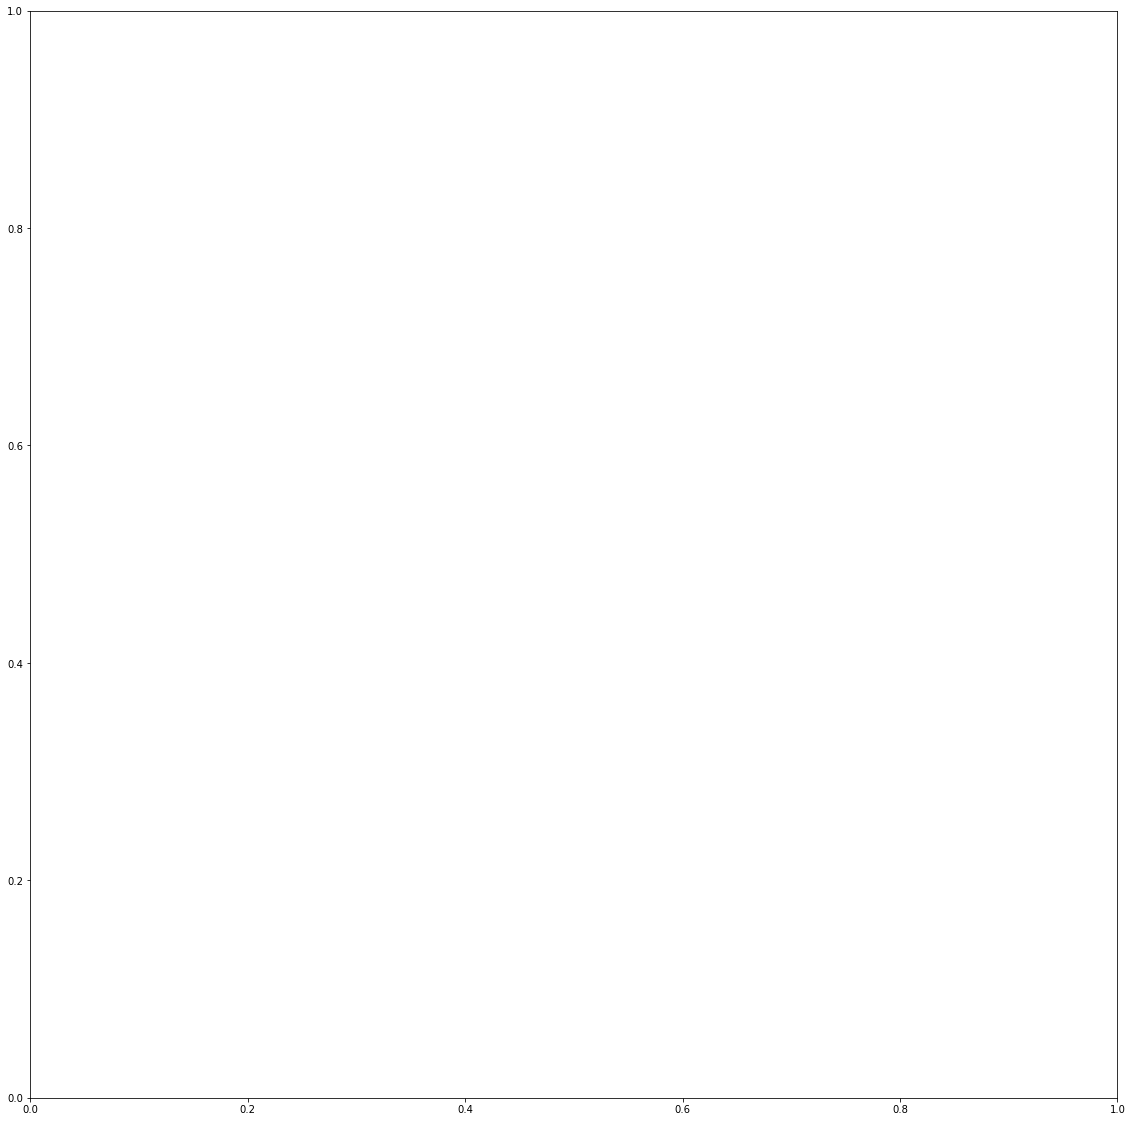

In [31]:
plt.figsize = (20,20)
gdf.plot(column='noise', alpha = 0.5, figsize = (20,20), size= 20)